<html>
<body>
    <div class="image-container" style="display: flex;">
        <img src="https://ufal.br/ufal/resolveuid/5ba5577fc45f41f48a6e8e9311488b28" alt="Image 1" style="width: 15%; height: auto;">
        <img src="https://ic.ufal.br/site-logo" alt="Image 2" style="width: 15%; height: auto;">
    </div>
   <h1 align="center"> Redes Neurais e Aprendizado Profundo - 2023.1 </h1>
   <h2 align="center"> Professor: Tiago Figueiredo Vieira </h2>
</body>
</html>

---

# Estimativa da máxima verossimilhança

Implemente o algoritmo da estimativa da máxima verossimilhança para encontrar os parâmetros da distribuição que melhor descreve a função densidade de probabilidade que deu origem aos dados disponíveis na base de dados em anexo ```x_train.npy``` usando o Tensorflow.

Utilizar os nomes **mean** e **sigma** para as variáveis de **média** e **desvio padrão** respectivamente.

**Gere a resposta final como um array do numpy(np.array()) não como uma lista.**

In [1]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp

In [3]:
dataset = np.load("dados/x_train.npy")
dataset.shape

(1000, 1)

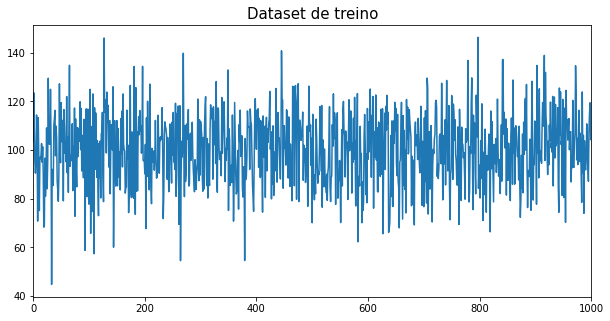

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(dataset)
plt.title('Dataset de treino', fontsize=15)
plt.xlim(0, len(dataset))
plt.show()

In [5]:
tf.__version__

'2.9.1'

In [6]:
tfp.__version__

'0.16.0'

In [7]:
tfd = tfp.distributions
normal = tfd.Normal(loc=tf.Variable(0., name='loc'), scale=5)
normal.trainable_variables

(<tf.Variable 'loc:0' shape=() dtype=float32, numpy=0.0>,)

In [8]:
def nll(x_train):
    return -tf.reduce_sum(normal.log_prob(x_train))

In [9]:
@tf.function
def get_loss_and_grads(x_train):
    with tf.GradientTape() as tape:
        tape.watch(normal.trainable_variables)
        loss = nll(x_train)
        grads = tape.gradient(loss, normal.trainable_variables)
    return loss, grads

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [10]:
def get_sigma(x, mu):
    return np.sqrt(np.sum((x - mu)**2) / len(x))

In [11]:
mean = []
sigma = []
for i in range(2000):
    loss, grads = get_loss_and_grads(dataset)
    optimizer.apply_gradients(zip(grads, normal.trainable_variables))
    
    loc_value = normal.loc.value()
    mean.append(loc_value)

    sigma_value = get_sigma(dataset, loc_value)
    sigma.append(sigma_value)
    if i % 100 == 0:
        print("Step {:03d}: Loss: {:.3f} Loc: {:.3f} Sigma: {:.3f}".format(i, loss, loc_value, sigma_value))


Step 000: Loss: 207181.375 Loc: 4.003 Sigma: 97.198
Step 100: Loss: 6926.972 Loc: 98.457 Sigma: 14.822
Step 200: Loss: 6869.978 Loc: 100.050 Sigma: 14.734
Step 300: Loss: 6869.961 Loc: 100.077 Sigma: 14.734
Step 400: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step 500: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step 600: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step 700: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step 800: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step 900: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step 1000: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step 1100: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step 1200: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step 1300: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step 1400: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step 1500: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step 1600: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step 1700: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step 1800: Loss: 6869.961 Loc: 100.078 Sigma: 14.734
Step

In [20]:
print(f'True Mean: {dataset.mean()}')
print(f'Estimated Mean: {mean[-1]}')
print(f"Diff: {abs(dataset.mean() - mean[-1])}")

True Mean: 100.07782745361328
Estimated Mean: 100.0777359008789
Diff: 9.1552734375e-05


In [21]:
print(f'True Sigma: {dataset.std()}')
print(f'Estimated Sigma: {sigma[-1]}')
print(f"Diff: {abs(dataset.std() - sigma[-1])}")

True Sigma: 14.733609199523926
Estimated Sigma: 14.733609537380852
Diff: 3.3785692643562015e-07


In [15]:
mean = np.array(mean)
sigma = np.array(sigma)

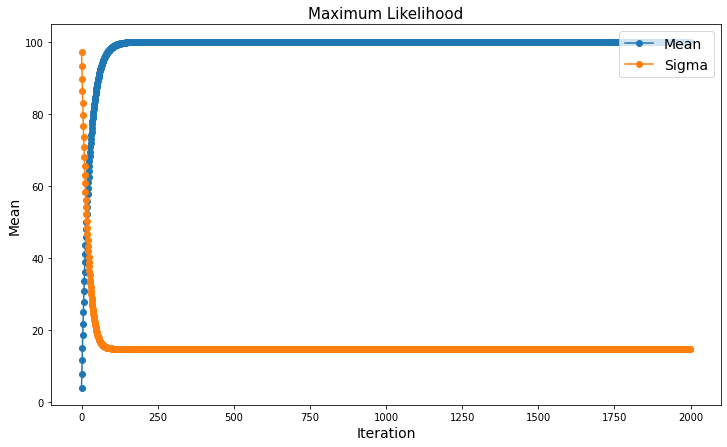

In [18]:
plt.figure(figsize=(12,7))
plt.title('Maximum Likelihood', fontsize=15)
plt.plot(mean, "o-", label='Mean')
plt.plot(sigma, "o-", label='Sigma')

plt.legend(loc="upper right",fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Mean', fontsize=14)
plt.show()